# Something

<IPython.core.display.Javascript object>


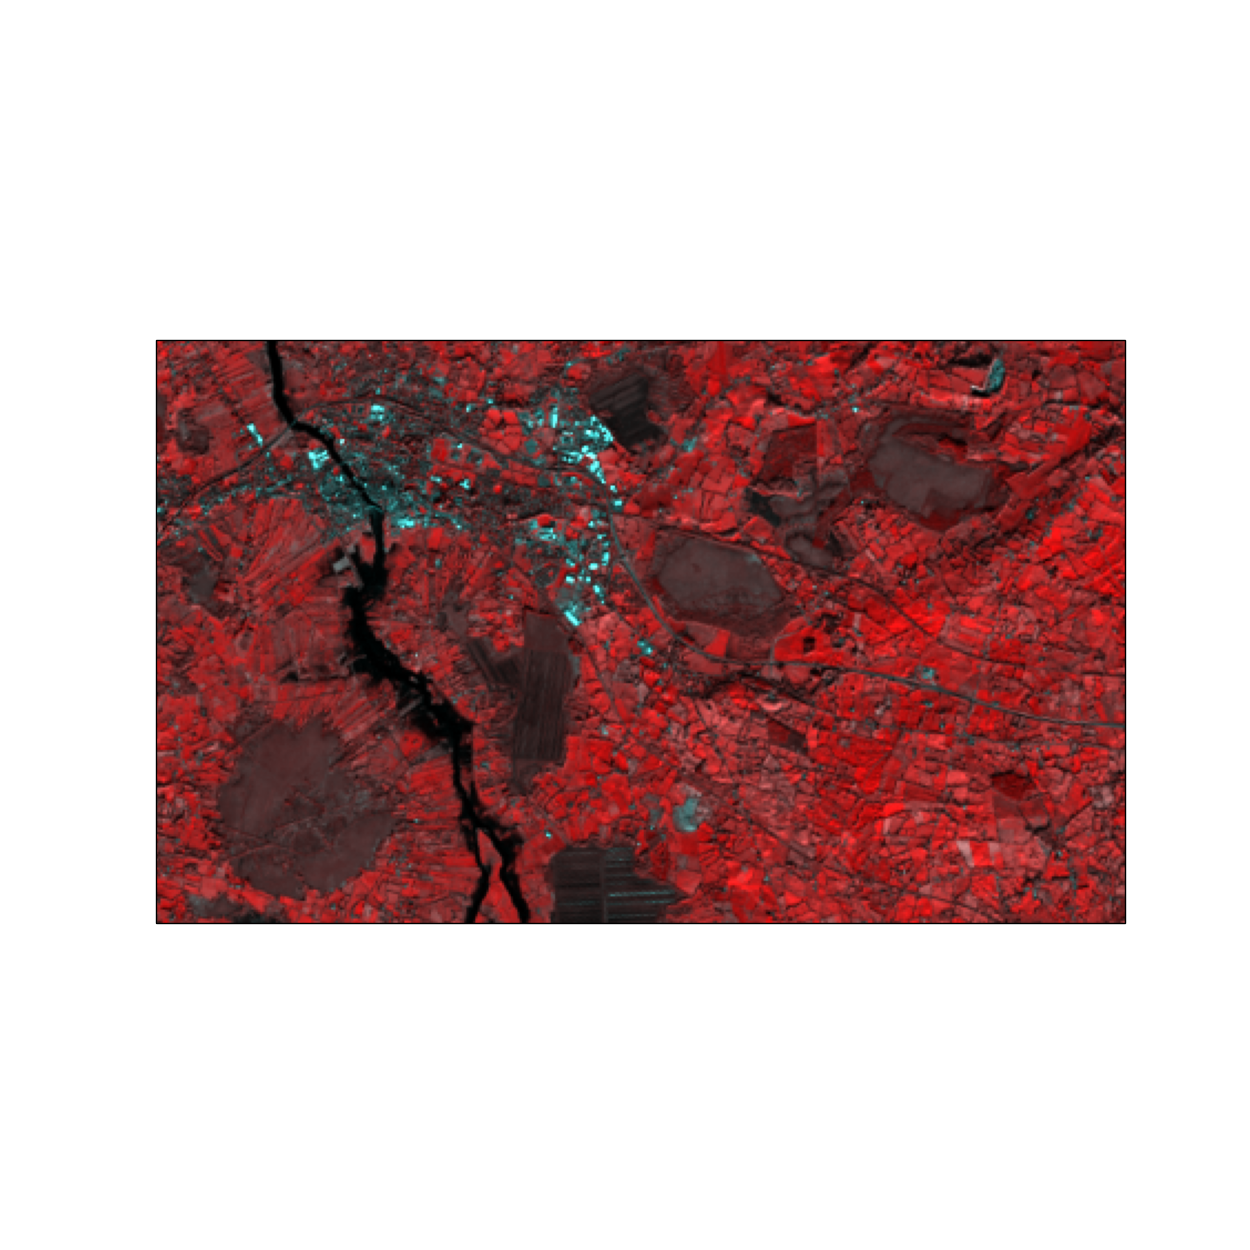

<IPython.core.display.Javascript object>


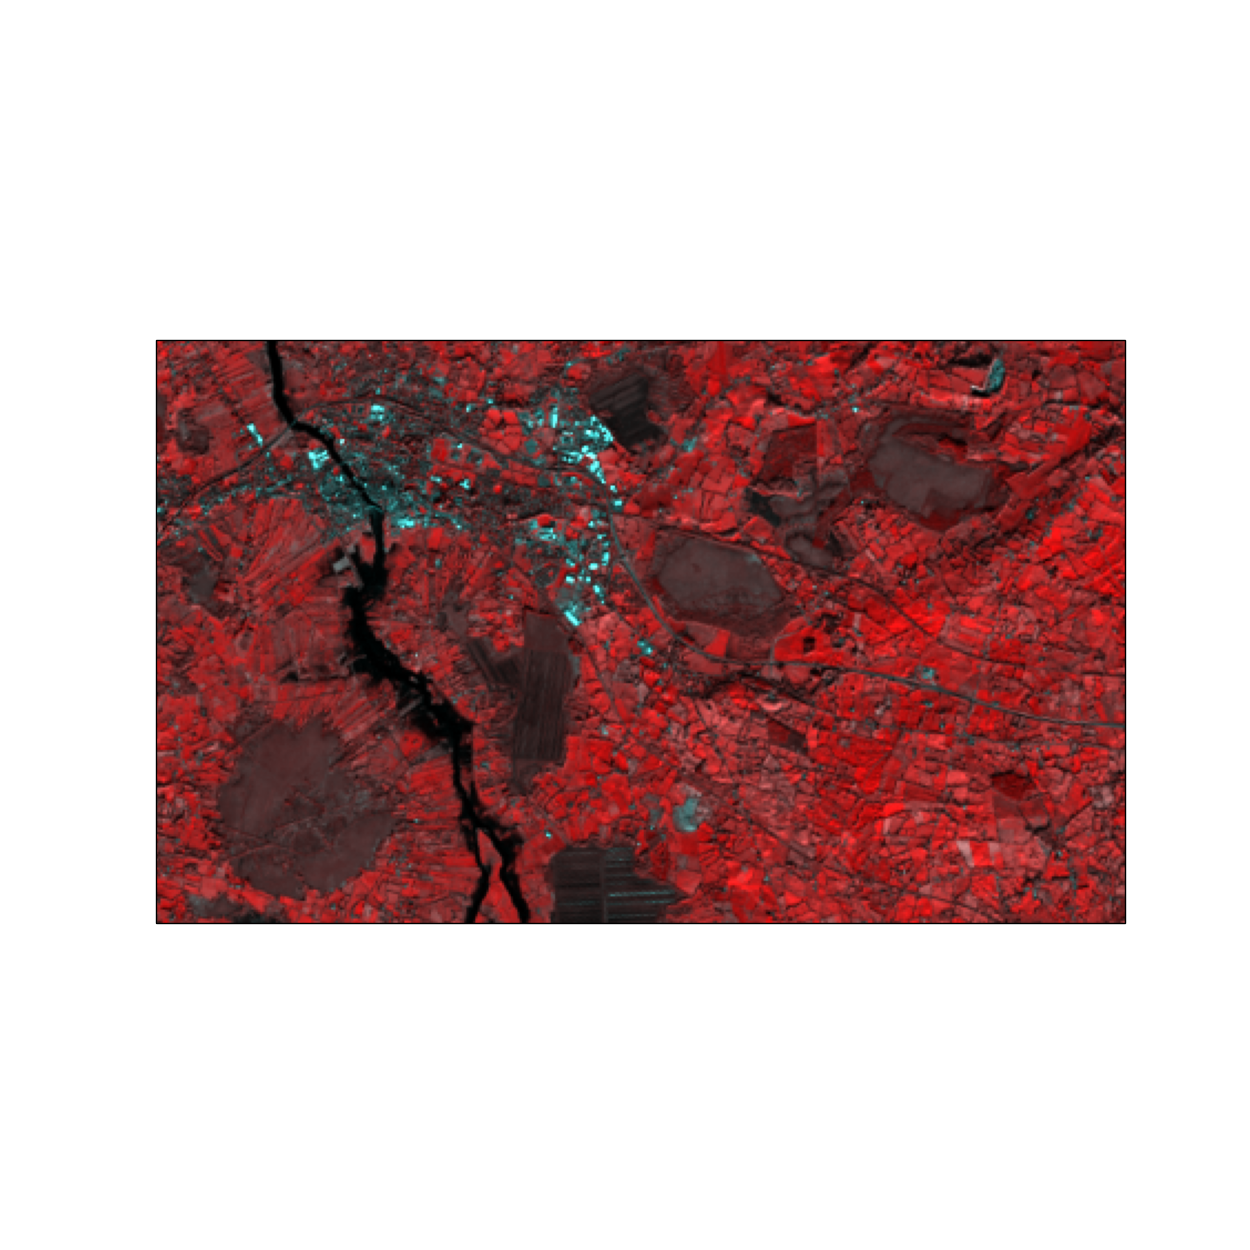

In [34]:
###This is a script designed to take an image from the Landsat 8 collection and run an NDVI on it. 
###To start, head over to the USGS portal and pick your Landsat 8 image, and download it. Make sure you have the seperate bands!



%matplotlib notebook

import numpy as np
import rasterio as rio
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import fiona as fi
import earthpy as es
import earthpy.spatial as es
import earthpy.plot as ep

###Open your image and check the CRS to ensure it is in the desired projection
with rio.open('Image/full_image_test-msi_chip.img') as dataset:
    img = dataset.read()
    xmin, ymin, xmax, ymax = dataset.bounds


###Create a an axis for plotting. 
plotCRS = ccrs.UTM(29) # make sure that this UTM(x) corresponds to the CRS printed above
fig, ax = plt.subplots(1, 1, figsize = (10, 10), subplot_kw=dict(projection=plotCRS)) #HUGH CHANGE SOME PARAMETERS DON'T JUST COPY

#and plot
ax.imshow(img[0], cmap='gray', vmin=200, vmax=500, transform = plotCRS, extent = [xmin, xmax, ymin, ymax])


def img_display(image, ax, bands, transform, extent):
    '''
    This is where you should write a docstring.
    '''
    # first, we transpose the image to re-order the indices
    dispimg = image.transpose([1, 2, 0])

    # next, we have to scale the image.
    dispimg = dispimg / dispimg.max()

    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)

    return handle, ax

h, ax = img_display(img, ax, [2, 1, 0], plotCRS, [xmin, xmax, ymin, ymax])
fig # just to save you from scrolling back up to see


In [48]:
maxvals = [img[i].max() for i in range(dataset.count)]
print(maxvals)

[9872, 10055, 9757, 10360, 14231, 12904, 11844]


In [49]:
def percentile_stretch(image, pmin=0., pmax=100.):
    '''
    This is where you should write a docstring.
    '''
    # here, we make sure that pmin < pmax, and that they are between 0, 100
    if not 0 <= pmin < pmax <= 100:
        raise ValueError('0 <= pmin < pmax <= 100')
    # here, we make sure that the image is only 2-dimensional
    if not image.ndim == 2:
        raise ValueError('Image can only have two dimensions (row, column)')

    minval = np.percentile(image, pmin)
    maxval = np.percentile(image, pmax)

    stretched = (image - minval) / (maxval - minval) # stretch the image to 0, 1
    stretched[image < minval] = 0 # set anything less than minval to the new minimum, 0.
    stretched[image > maxval] = 1 # set anything greater than maxval to the new maximum, 1.

    return stretched

In [51]:
def img_display(image, ax, bands, transform, extent, pmin=0, pmax=100):
    '''
    This is where you should write a docstring.
    '''
    dispimg = image.copy().astype(np.float32) # make a copy of the original image,
    # but be sure to cast it as a floating-point image, rather than an integer

    for b in range(image.shape[0]): # loop over each band, stretching using percentile_stretch()
        dispimg[b] = percentile_stretch(image[b], pmin=pmin, pmax=pmax)

    # next, we transpose the image to re-order the indices
    dispimg = dispimg.transpose([1, 2, 0])

    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)

    return handle, ax

<IPython.core.display.Javascript object>


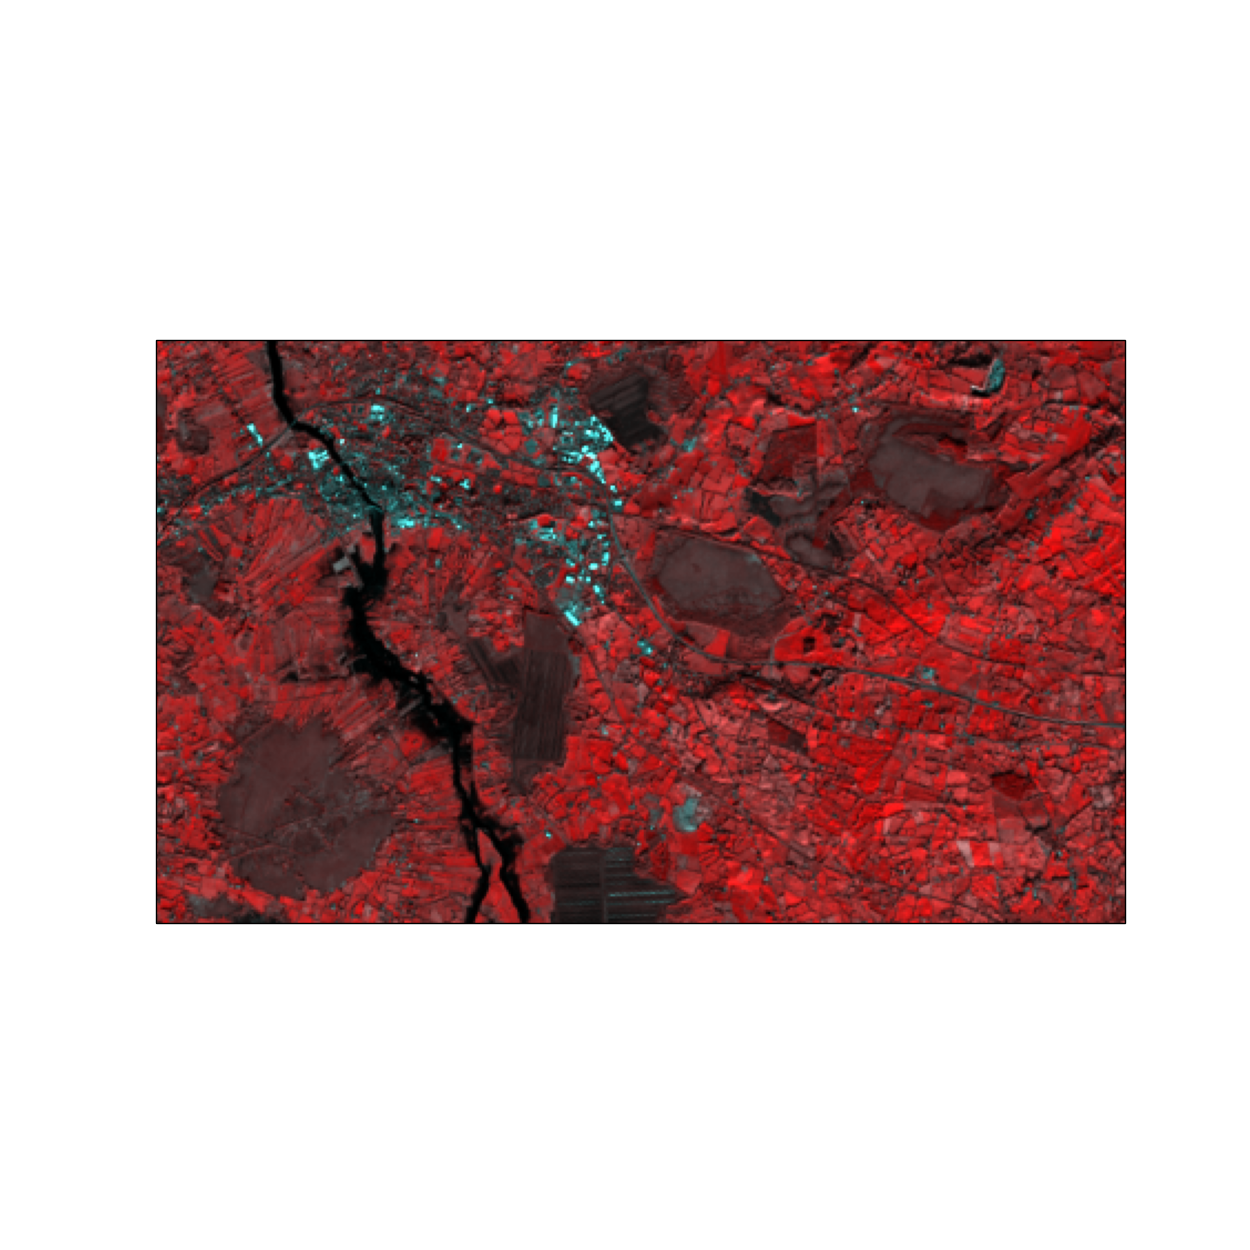

In [54]:
h, ax = img_display(img, ax, [4, 3, 3], plotCRS, [xmin, xmax, ymin, ymax], pmin=0.1, pmax=99.9)
fig # just to save you from scrolling back up to see

[[0.31833285 0.3516113  0.30259849 ... 0.24628057 0.22942822 0.2493824 ]
 [0.30133365 0.34750979 0.2887878  ... 0.22987013 0.20938917 0.2591707 ]
 [0.25549327 0.31066166 0.27910864 ... 0.18177343 0.20426167 0.23512309]
 ...
 [0.17624309 0.24398625 0.2600312  ... 0.18294225 0.14178263 0.10157368]
 [0.19457995 0.22562857 0.22055504 ... 0.14901524 0.11003891 0.13074734]
 [0.13187139 0.10695726 0.18094561 ... 0.13561736 0.20282516 0.2499074 ]]


[1.32879683e-01 1.30983693e-01 1.42708488e-01 1.60627842e-01
 2.17255222e-01 2.20770382e-01 1.75980219e-01 1.26764663e-01
 1.23526540e-01 1.30698669e-01 1.41075058e-01 1.54171142e-01
 1.56229779e-01 1.31251397e-01 1.29648837e-01 9.61329399e-02
 5.64229657e-02 1.01743959e-01 2.11465223e-01 2.52061985e-01
 2.38208880e-01 2.07041073e-01 1.99649855e-01 2.52565418e-01
 2.58138352e-01 2.44380741e-01 2.19311831e-01 2.20822062e-01
 2.01310861e-01 2.15856140e-01 1.53405018e-01 5.02392344e-02
 1.16341228e-01 1.93794192e-01 2.29866104e-01 2.46236351e-01
 2.36166460e-01 1.72593113e-01 1.44862888e-01 1.59310934e-01
 1.77673390e-01 1.92748999e-01 2.19628887e-01 1.96934355e-01
 1.73508484e-01 1.92935865e-01 2.06711233e-01 1.70318313e-01
 1.75127957e-01 1.51502177e-01 1.56070999e-01 2.07113943e-01
 2.37569770e-01 2.20314548e-01 1.87115306e-01 1.63641520e-01
 1.49876436e-01 1.83628622e-01 1.96367609e-01 1.99836423e-01
 2.01278825e-01 1.87279152e-01 1.65259349e-01 1.53341884e-01
 1.61624650e-01 1.760005

In [18]:
import earthpy.plot as ep

In [6]:
pip install earthpy

  Using cached earthpy-0.9.4-py3-none-any.whl (1.4 MB)
  Using cached scikit_image-0.19.2-cp37-cp37m-win_amd64.whl (12.5 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
Note: you may need to restart the kernel to use updated packages.


In [56]:
the_ndvi = es.normalized_diff(img[4], img[3])
print(the_ndvi)

[[0.31833285 0.3516113  0.30259849 ... 0.24628057 0.22942822 0.2493824 ]
 [0.30133365 0.34750979 0.2887878  ... 0.22987013 0.20938917 0.2591707 ]
 [0.25549327 0.31066166 0.27910864 ... 0.18177343 0.20426167 0.23512309]
 ...
 [0.17624309 0.24398625 0.2600312  ... 0.18294225 0.14178263 0.10157368]
 [0.19457995 0.22562857 0.22055504 ... 0.14901524 0.11003891 0.13074734]
 [0.13187139 0.10695726 0.18094561 ... 0.13561736 0.20282516 0.2499074 ]]


<IPython.core.display.Javascript object>


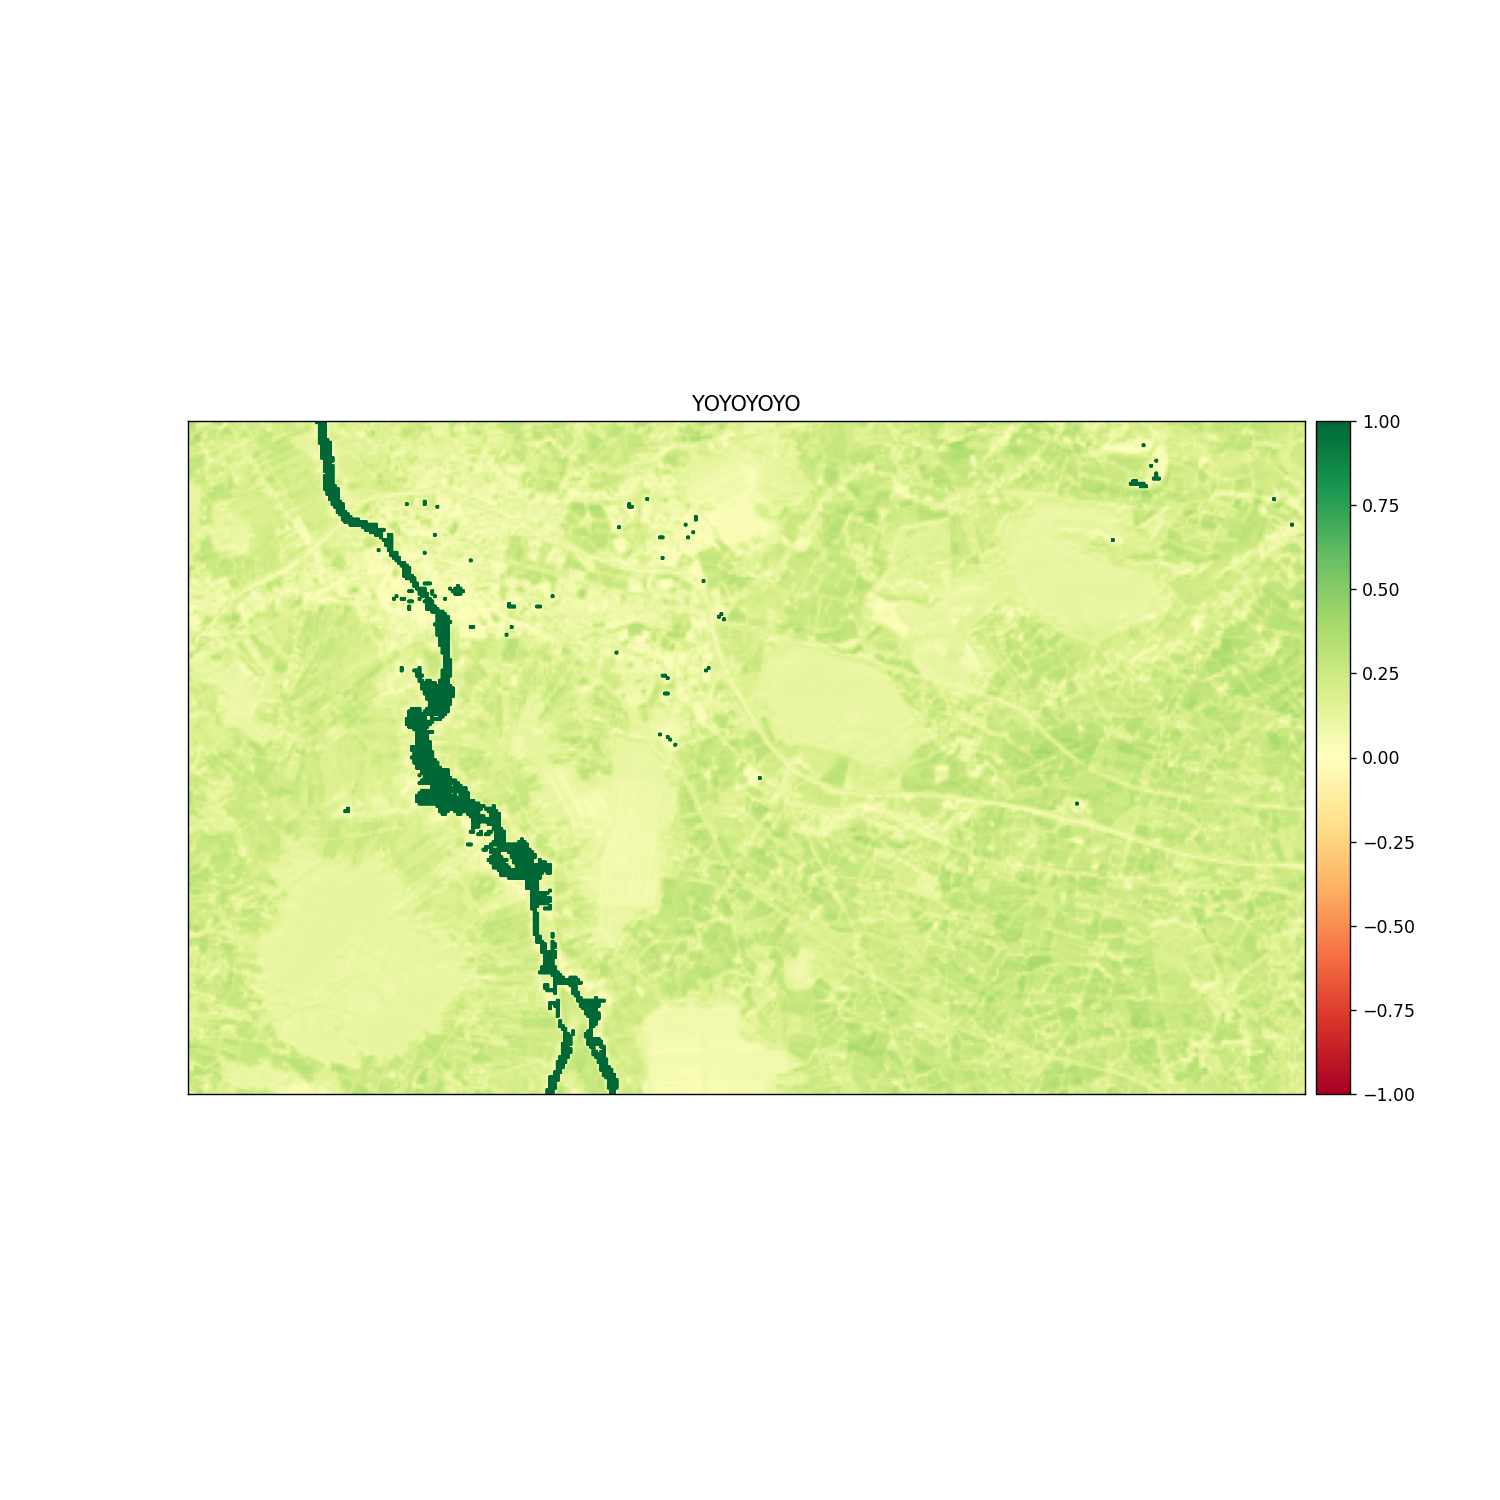

<AxesSubplot:title={'center':'YOYOYOYO'}>

In [61]:
ep.plot_bands(the_ndvi, cmap = 'RdYlGn', cols=1, vmin = -1, vmax = 1, title="YOYOYOYO")

AttributeError: 'numpy.ndarray' object has no attribute 'values'

SyntaxError: EOL while scanning string literal (1192971539.py, line 1)

SyntaxError: invalid syntax (3027953372.py, line 1)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
